___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [1]:
!python --version

Python 3.7.14


In [2]:
# pip install tensorflow

In [3]:
import tensorflow as tf
tf.__version__

'2.8.2'

# Keras Syntax Basics

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [7]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [8]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


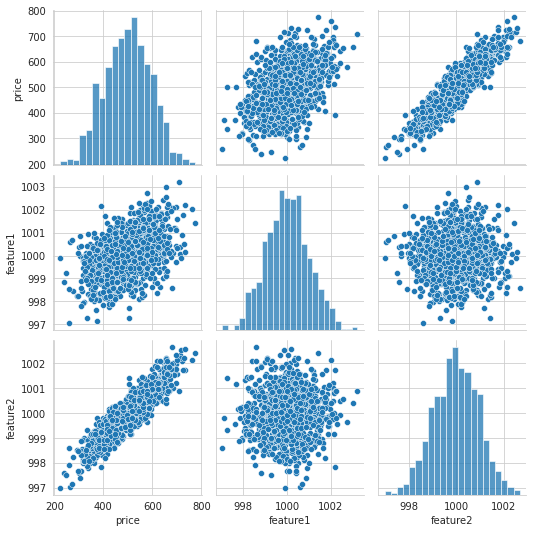

In [11]:
sns.pairplot(df);

In [12]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# X = df[['feature1', 'feature2']].values  # convert to array
# y = df['price'].values

In [15]:
X = df[['feature1', 'feature2']] 
y = df['price']

In [16]:
X

,feature1,feature2
0,999.788,999.766
1,998.862,1001.042
2,1000.070,998.844
3,999.952,1000.441
4,1000.446,1000.339
...,...,...
995,1000.019,999.673
996,998.855,1000.020
997,1001.452,998.848
998,1000.771,998.563


In [17]:
y

0     461.528
1     548.130
2     410.297
3     540.382
4     546.025
        ...  
995   476.526
996   457.313
997   456.721
998   403.316
999   599.367
Name: price, Length: 1000, dtype: float64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [19]:
X_train.shape

(700, 2)

In [20]:
X_test.shape

(300, 2)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [23]:
scaler = MinMaxScaler()

In [24]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [25]:
import tensorflow as tf

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Activation

In [27]:
# help(Sequential)

In [28]:
# help(Dense)

In [29]:
X_train.shape

(700, 2)

In [30]:
# First way to create model

model = Sequential([Input(shape = X_train.shape[1]),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])

In [31]:
# Second way to create model (recommended)

model = Sequential()
#model.add(Input(shape = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 0.86050916,  0.5146744 , -0.49992442,  0.1166997 ],
        [-0.12818694, -0.21894598,  0.7377167 ,  0.9946902 ]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.7955708 ,  0.5021462 , -0.46630868, -0.79038846],
        [-0.8558812 ,  0.4526903 , -0.6635163 ,  0.37911266],
        [ 0.1714918 , -0.48795733, -0.5332589 , -0.14029855],
        [ 0.17741495,  0.3862881 ,  0.27075583,  0.01913047]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.20933354,  0.08345205, -0.7563254 ,  0.6373789 ],
        [-0.557624  , -0.13790524, -0.36420482, -0.04837185],
        [ 0.49420124, -0.27617496,  0.0743

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [34]:
model.compile(optimizer = "rmsprop", loss = "mse")

In [35]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
22/22 [==============================] - 2s 4ms/step - loss: 256579.4219
Epoch 2/250
22/22 [==============================] - 0s 7ms/step - loss: 256463.5469
Epoch 3/250
22/22 [==============================] - 0s 6ms/step - loss: 256343.2031
Epoch 4/250
22/22 [==============================] - 0s 5ms/step - loss: 256210.1094
Epoch 5/250
22/22 [==============================] - 0s 3ms/step - loss: 256057.5781
Epoch 6/250
22/22 [==============================] - 0s 4ms/step - loss: 255882.6719
Epoch 7/250
22/22 [==============================] - 0s 3ms/step - loss: 255683.7188
Epoch 8/250
22/22 [==============================] - 0s 3ms/step - loss: 255456.8906
Epoch 9/250
22/22 [==============================] - 0s 3ms/step - loss: 255199.0625
Epoch 10/250
22/22 [==============================] - 0s 5ms/step - loss: 254907.5625
Epoch 11/250
22/22 [==============================] - 0s 5ms/step - loss: 254580.3594
Epoch 12/250
22/22 [==============================] - 0s 4ms/st

In [36]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 2.440422  ,  0.31027418,  1.0883777 ,  1.7082392 ],
        [ 2.9977212 , -0.39984995,  3.872614  ,  4.133269  ]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.746763  , -0.20353895,  0.7545146 ,  0.7581406 ], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 2.6978076 ,  2.302287  , -0.46630868, -0.79038846],
        [-0.6816026 ,  0.53801614, -0.6635163 ,  0.37911266],
        [ 2.35085   ,  1.5852764 , -0.5332589 , -0.14029855],
        [ 2.352525  ,  2.4601343 ,  0.27075583,  0.01913047]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([0.73168147, 0.634109  , 0.        , 0.        ], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.20933354,  2.1114726 , -0.7563254 ,  2.6462371 ],
        [-0.557624  ,  1.8874984 , -

In [37]:
model.history.history

{'loss': [256579.421875,
  256463.546875,
  256343.203125,
  256210.109375,
  256057.578125,
  255882.671875,
  255683.71875,
  255456.890625,
  255199.0625,
  254907.5625,
  254580.359375,
  254212.578125,
  253802.484375,
  253342.828125,
  252832.734375,
  252268.78125,
  251649.515625,
  250965.59375,
  250213.984375,
  249391.546875,
  248499.984375,
  247524.359375,
  246470.75,
  245328.0625,
  244094.421875,
  242763.640625,
  241332.828125,
  239797.28125,
  238143.8125,
  236392.640625,
  234522.78125,
  232527.890625,
  230394.671875,
  228131.890625,
  225728.875,
  223210.46875,
  220542.265625,
  217726.953125,
  214752.609375,
  211636.59375,
  208376.09375,
  204944.6875,
  201362.234375,
  197610.75,
  193685.734375,
  189625.515625,
  185387.359375,
  180993.078125,
  176409.390625,
  171707.203125,
  166844.890625,
  161818.890625,
  156626.28125,
  151313.609375,
  145849.484375,
  140266.484375,
  134546.15625,
  128695.859375,
  122770.546875,
  116750.671875,
  1

In [38]:
pd.DataFrame(model.history.history)

,loss
0,256579.422
1,256463.547
2,256343.203
3,256210.109
4,256057.578
...,...
245,24.072
246,24.497
247,24.230
248,24.397


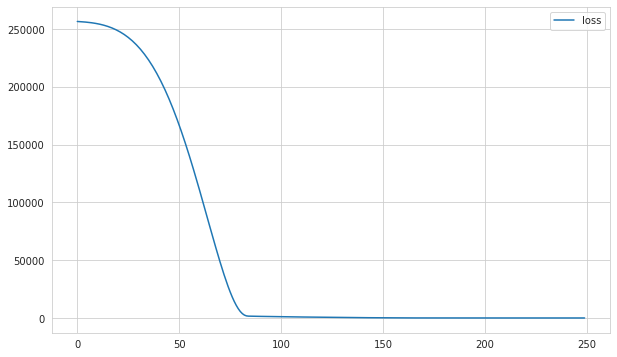

In [39]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 3000.0)

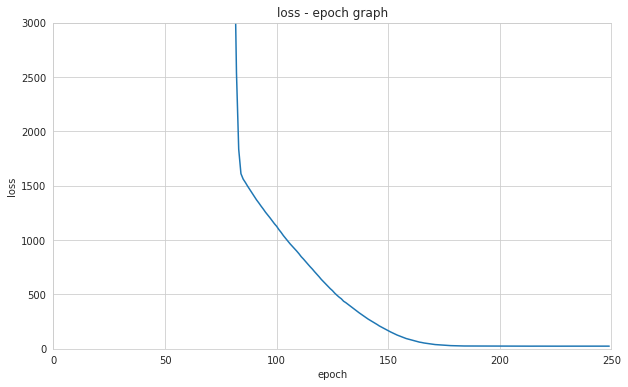

In [40]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

## Model Performance

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [42]:
model.evaluate(X_train, y_train, verbose=0)

23.98128890991211

In [43]:
model.evaluate(X_test, y_test, verbose=0)

25.83379554748535

In [44]:
y_pred = model.predict(X_test)
y_pred.shape

(300, 1)

In [45]:
y_test.shape

(300,)

In [46]:
y_pred.reshape(-1,).shape

(300,)

In [47]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
603,568.605,569.329
261,531.662,542.841
266,439.090,433.399
237,469.073,480.406
687,507.443,502.799
837,478.358,486.211
78,408.122,410.832
866,531.482,538.765
800,492.873,494.278
235,593.668,611.594


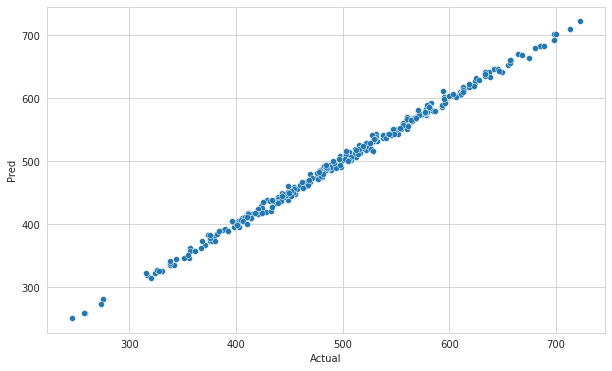

In [48]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

In [49]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [50]:
eval_metric(y_test, y_pred)

r2_score: 0.9970616775855768 
mae: 4.105809549436766 
mse: 25.83382371080007 
rmse: 5.0826984674285045


## Final Model and Model Deployment

### Final Model Training

In [51]:
scaler = MinMaxScaler().fit(X)

In [52]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [53]:
X_scaled = scaler.transform(X)

In [54]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[1]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 256659.1406
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 256132.7969
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 255552.1719
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 254893.5312
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 254143.2188
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 253301.2969
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 252349.6250
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 251280.3438
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 250067.4688
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 248699.3438
Epoch 11/250
32/32 [==============================] - 0s 2ms/step - loss: 247151.3438
Epoch 12/250
32/32 [==============================] - 0s 2ms/st

In [55]:
final_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4)                 12        
                                                                 
 dense_9 (Dense)             (None, 4)                 20        
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


### Saving a Model

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

Keras saves models by inspecting their architectures. This technique saves everything:

- The weight values
- The model's architecture
- The model's training configuration (what you pass to the .compile() method)
- The optimizer and its state, if any (this enables you to restart training where you left off)

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).



In [56]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

In [57]:
#final_model.save("model_fake_reg") 

### Loading Model

In [58]:
from tensorflow.keras.models import load_model

In [59]:
model_fake_reg = load_model('model_fake_reg.h5')

In [60]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

## Prediction-1

In [61]:
sample = [[998, 1000]]

In [62]:
sample_scaled = scaler_fake_reg.transform(sample)

In [63]:
model_fake_reg.predict(sample_scaled)

array([[421.35168]], dtype=float32)

## Prediction-2

In [64]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [65]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [66]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [67]:
model_fake_reg.predict(sample_scaled)

array([[381.0387 ],
       [332.55045],
       [284.06223],
       [235.57396],
       [185.24669]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___